# Project 8 - ANN
Γεώργιος Δάλλας ΑΕΜ: 217
## 1-2.
First of all, the Dog Breed Image Dataset is downloaded from kaggle and unzipped.

In [88]:
!unzip archive.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [89]:
import os
import PIL
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import tensorflow as tf
from sklearn.model_selection import train_test_split

## 3.
Images are loaded into numpy arrays and resized into 64x64. Targets are encoded to integers according their class id. Afterwards targets are transformed into one hot vectors.

In [90]:

class_names = sorted(os.listdir('dataset'))
class_ids = {label: i for i, label in enumerate(class_names)}
class_ids
image_size = (64, 64)


inputs = []
targets = []
for label in class_names:
    for filename in os.listdir(f'dataset/{label}'):
        filepath = f'dataset/{label}/{filename}'
        img = PIL.Image.open(filepath).convert('RGB').resize(image_size)
        inputs.append(img)
        targets.append(class_ids[label])
inputs = np.float32(inputs)
targets = np.int32(targets)

inputs.shape, targets.shape

seed = 0

tf.random.set_seed(seed=seed)
np.random.seed(seed=seed)
random.seed(seed)

from sklearn.model_selection import train_test_split

test_size = 0.3
stratify = [targets.shape]

x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    targets,
    test_size=0.3,
    stratify=targets,
    random_state=seed
)



#one hot encoding
y_train = np.eye(len(class_names))[y_train]
y_test = np.eye(len(class_names))[y_test]
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((676, 64, 64, 3), (676, 10), (291, 64, 64, 3), (291, 10))

## 4.
The mlp model with the example's architecture is created. First it takes as input the input size, so (64, 64, 3). Afterwards it flattens it to a vector of size 12288. Next it gets to a layer with 128 neurons with relu activation. Next layer is exactly the same type and finaly it has a layer of 10 neurons with softmax activation used for output.

In [91]:




input_size = x_train.shape[1:]
output_size = len(class_names)

mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='MLP')


mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_30 (Flatten)            │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,590,794 (6.07 MB)

 Trainable params: 1,590,794 (6.07 MB)

 Non-trainable params: 0 (0.00 B)

## 5. On this step the mlp is trained using adam optimizer.

In [92]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
mlp.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


batch_size = 32
epochs = 50

history = mlp.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/50


c:\Users\dalla\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.1036 - loss: 1024.7408 - val_accuracy: 0.1134 - val_loss: 468.3441
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.1642 - loss: 275.4756 - val_accuracy: 0.2027 - val_loss: 133.5555
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.2678 - loss: 113.8873 - val_accuracy: 0.2921 - val_loss: 76.7744
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.3447 - loss: 77.5840 - val_accuracy: 0.3093 - val_loss: 104.6225
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.4867 - loss: 44.3986 - val_accuracy: 0.4983 - val_loss: 29.4337
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.5607 - loss: 34.5106 - val_accuracy: 0.5395 - val_loss: 19.8871
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.5710 - loss: 27.7957 - val_accuracy: 0.3814 - val_loss: 46.9165
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.5089 - loss: 34.9382 - val_accuracy

## 6.
Loss and accuracy history plots are printed for train and test. (Note that for validation, test set is parsed.)

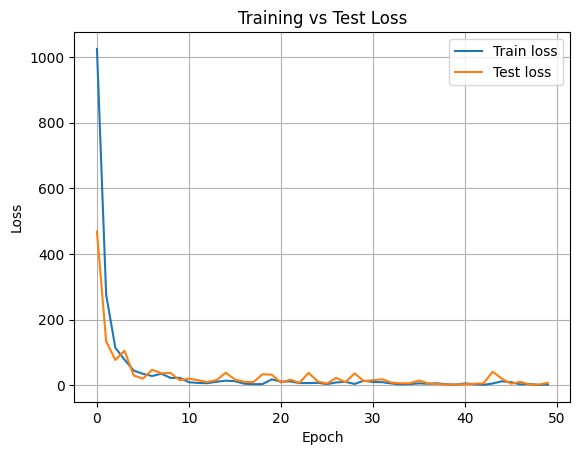

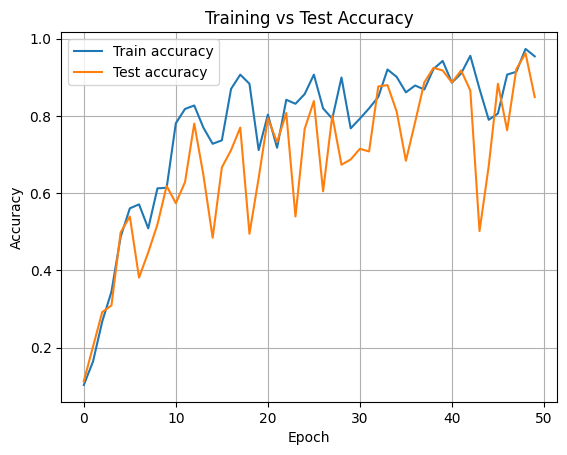

In [93]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Test Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## 7.
A cnn is created with same input as the mlp, a convolution2d layer with 32 filters of size 3x3 kernel and strides 2 for downsampling. Afterwards a dropout with random disabling of 20% of activations, then a layer with the same convolutions, a flattening layer, then a layer with 128 neurons and relu activation and finally a layer with 10 neuros and softmax activation for output..
A history plot for loss and accuracy is printed for train and test. \\
The CNN is much better than a simple mlp, since the filters learn to extract features from images, than just getting the values of the pixels of the whole image to classify them. 

In [94]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='CNN')
cnn.summary()

optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,298 (13.18 MB)

 Trainable params: 3,456,298 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - accuracy: 0.1391 - loss: 110.6993 - val_accuracy: 0.2646 - val_loss: 2.2412
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.3373 - loss: 1.9009 - val_accuracy: 0.6735 - val_loss: 1.2786
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.7086 - loss: 0.8903 - val_accuracy: 0.8900 - val_loss: 0.5066
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.8935 - loss: 0.3625 - val_accuracy: 0.9828 - val_loss: 0.1351
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.9527 - loss: 0.1559 - val_accuracy: 0.9966 - val_loss: 0.0346
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.9808 - loss: 0.0652 - val_accuracy: 0.9966 - val_loss: 0.0538
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.9822 - loss: 0.0539 - val_accuracy: 1.0000 - val_loss: 0.0199
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.9911 - loss: 0.0603 - val_accuracy: 

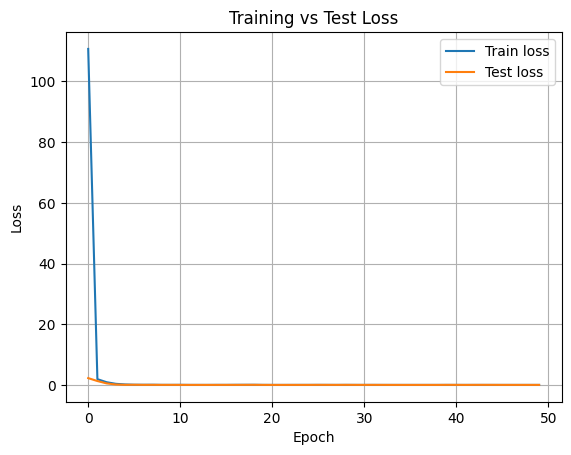

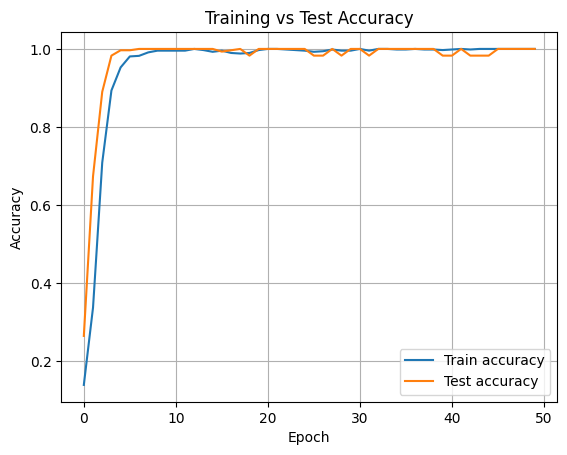

In [95]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Test Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
test_accuracy = cnn.evaluate(x_test, y_test)
print("accuracy ",test_accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0069
accuracy  [0.006865102332085371, 1.0]


## 8.
For an attemp of improving the accuracy,  the first conv2d layer had a 2x2 kernel size, so the quality decrades slower and a batch normalization was added. The train accuracy is still 100 but the test acc is not 100% just like the cnn above.

In [105]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=2, activation='relu', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='CNN')
cnn.summary()

optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_61 (Conv2D)              │ (None, 32, 32, 32)     │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_39 (Flatten)            │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,578 (14.11 MB)

 Trainable params: 3,697,514 (14.10 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - accuracy: 0.5340 - loss: 2.6102 - val_accuracy: 0.8041 - val_loss: 1.5942
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.9719 - loss: 0.2896 - val_accuracy: 0.9588 - val_loss: 0.3320
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.9941 - loss: 0.0348 - val_accuracy: 0.9759 - val_loss: 0.1156
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 0.9985 - loss: 0.0079 - val_accuracy: 0.9828 - val_loss: 0.0888
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9828 - val_loss: 0.0877
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9828 - val_loss: 0.0874
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9828 - val_loss: 0.0868
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 1.0000 - loss: 8.9319e-04 - val_accuracy